## Import Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/mnt/xarfuse/uid-158183/741aae92-ns-4026531840/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy



## Import Data

In [45]:
df = pd.read_csv('master.csv')
df.head()

,Year,Opp,OppNetRating,MP,GmSc,GmSc36,NormalizedGmSc36,PerCapita,Num,Rating
0,2018-2019,LAL,-1.7,37.8,37.0,35.2,1.26,1.325,52.0,3.94
1,2018-2019,LAC,0.9,39.8,26.4,23.9,0.03,1.325,52.0,3.94
2,2018-2019,CHI,-8.4,33.3,15.1,16.3,-0.79,NaN,NaN,3.95
3,2018-2019,IND,3.4,35.1,22.4,23.0,-0.07,2.371,20.0,3.48
4,2018-2019,OKC,3.3,37.5,10.5,10.1,-1.46,1.965,12.0,3.76


## Graphs

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NormalizedGmSc36   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                  0.004929
Date:                Thu, 07 Nov 2019   Prob (F-statistic):              0.944
Time:                        17:41:48   Log-Likelihood:                -272.79
No. Observations:                 194   AIC:                             547.6
Df Residuals:                     193   BIC:                             550.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rating        -0.0014      0.019     -0.070      0.944      -0.039       0.037
==============================================================================
Omnibus:                        4.557   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                2.724
Skew:                           0.000   Prob(JB):                        0.256
Kurtosis:                       2.419   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

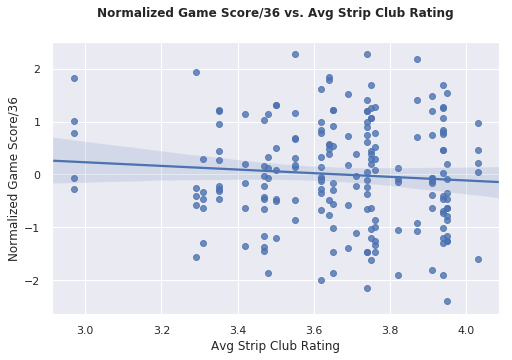

In [46]:
sns.set()

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

sns.regplot(x = 'Rating', y = 'NormalizedGmSc36', data = df)
plt.title('Normalized Game Score/36 vs. Avg Strip Club Rating', fontweight = 'bold').set_position([.5, 1.07])
plt.xlabel('Avg Strip Club Rating')
plt.ylabel('Normalized Game Score/36')

plt.savefig('rating.png', bbox_inches = 'tight', dpi = 150)

sm.OLS(df['NormalizedGmSc36'], df['Rating']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NormalizedGmSc36   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8924
Date:                Thu, 07 Nov 2019   Prob (F-statistic):              0.347
Time:                        17:41:49   Log-Likelihood:                -169.48
No. Observations:                 124   AIC:                             341.0
Df Residuals:                     123   BIC:                             343.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PerCapita      0.0200      0.021      0.945      0.347      -0.022       0.062
==============================================================================
Omnibus:                        2.061   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.601
Skew:                          -0.094   Prob(JB):                        0.449
Kurtosis:                       2.476   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

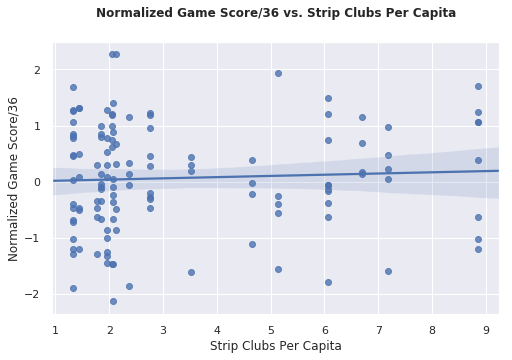

In [47]:
sns.set()

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

plot_df = df[df['PerCapita'] > 0]

sns.regplot(x = 'PerCapita', y = 'NormalizedGmSc36', data = plot_df)
plt.title('Normalized Game Score/36 vs. Strip Clubs Per Capita', fontweight = 'bold').set_position([.5, 1.07])
plt.xlabel('Strip Clubs Per Capita')
plt.ylabel('Normalized Game Score/36')

plt.savefig('capita.png', bbox_inches = 'tight', dpi = 150)

sm.OLS(plot_df['NormalizedGmSc36'], plot_df['PerCapita']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NormalizedGmSc36   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.239
Date:                Thu, 07 Nov 2019   Prob (F-statistic):              0.268
Time:                        17:41:49   Log-Likelihood:                -169.30
No. Observations:                 124   AIC:                             340.6
Df Residuals:                     123   BIC:                             343.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Num            0.0031      0.003      1.113      0.268      -0.002       0.009
==============================================================================
Omnibus:                        2.297   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.774
Skew:                          -0.123   Prob(JB):                        0.412
Kurtosis:                       2.468   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

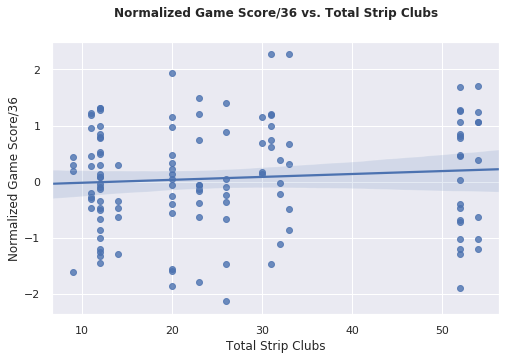

In [48]:
sns.set()

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

plot_df = df[df['Num'] > 0]

sns.regplot(x = 'Num', y = 'NormalizedGmSc36', data = plot_df)
plt.title('Normalized Game Score/36 vs. Total Strip Clubs', fontweight = 'bold').set_position([.5, 1.07])
plt.xlabel('Total Strip Clubs')
plt.ylabel('Normalized Game Score/36')

plt.savefig('num.png', bbox_inches = 'tight', dpi = 150)

sm.OLS(plot_df['NormalizedGmSc36'], plot_df['Num']).fit().summary()

In [49]:
sm.OLS(df['NormalizedGmSc36'], df[['OppNetRating', 'Rating']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NormalizedGmSc36   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.378
Date:                Thu, 07 Nov 2019   Prob (F-statistic):             0.0362
Time:                        17:41:49   Log-Likelihood:                -269.44
No. Observations:                 194   AIC:                             542.9
Df Residuals:                     192   BIC:                             549.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OppNetRating    -0.0384      0.015     -2.598      0.010      -0.067      -0.009
Rating          -0.0006      0.019     -0.034      0.973      -0.038       0.037
==============================================================================
Omnibus:                        4.180   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                2.611
Skew:                          -0.043   Prob(JB):                        0.271
Kurtosis:                       2.438   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""